# **Fake news detector**

### Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import re
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.model_selection import train_test_split


### Datapath

In [4]:
true_csv_path = 'data/True.csv/True.csv'
fake_csv_path = 'data/Fake.csv/Fake.csv'

df_true = pd.read_csv(true_csv_path)
df_fake = pd.read_csv(fake_csv_path)

### Data preview

In [5]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### Types of real news

In [7]:
print("Types of True news: ")
subject_counts_true = df_true['subject'].value_counts()
print("Counts of different types of news:")
print(subject_counts_true)

Types of True news: 
Counts of different types of news:
subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64


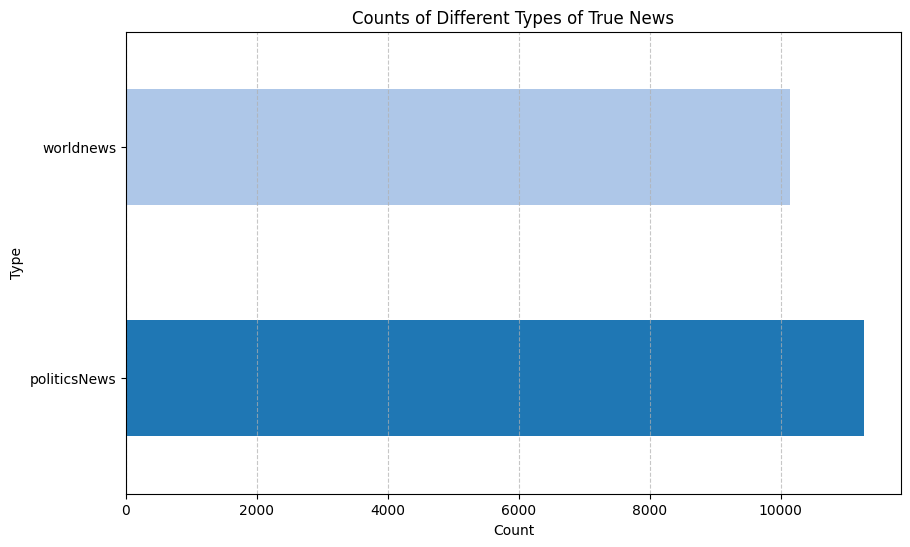

In [8]:
colors = plt.cm.tab20.colors
plt.figure(figsize=(10, 6))
subject_counts_true.plot(kind='barh', color=colors[:len(subject_counts_true)])
plt.title('Counts of Different Types of True News')
plt.xlabel('Count')
plt.ylabel('Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Types of Fake news

In [9]:
print("Types of Fake news: ")
subject_counts_fake = df_fake['subject'].value_counts()
print("Counts of different types of news:")
print(subject_counts_fake)

Types of Fake news: 
Counts of different types of news:
subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


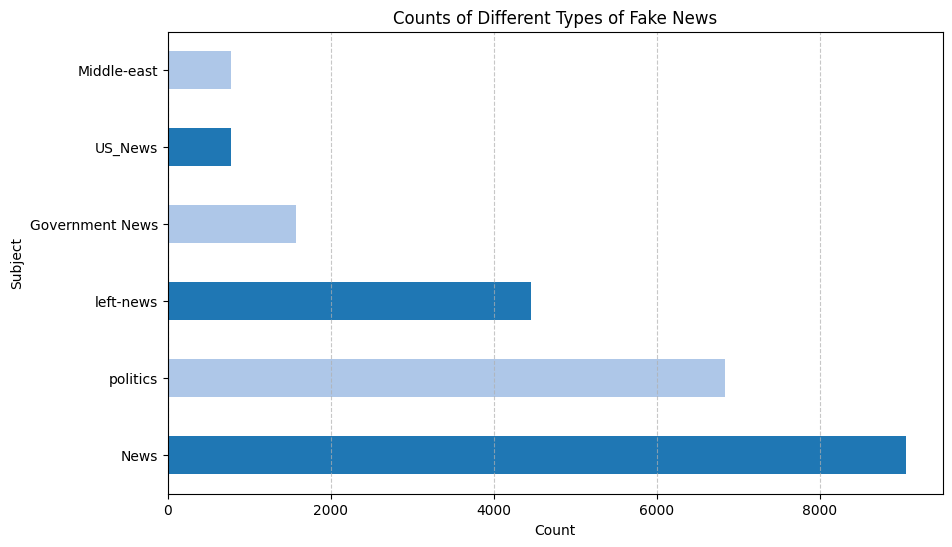

In [10]:
plt.figure(figsize=(10, 6))
subject_counts_fake.plot(kind='barh', color=colors[:len(subject_counts_true)])
plt.title('Counts of Different Types of Fake News')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Labeling the dataset

In [11]:
df_true['label']=1
df_fake['label']=0

In [12]:
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [13]:
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


### Combining dataset

In [14]:
data_combined = pd.concat([df_true, df_fake], ignore_index=True)
data = data_combined.sample(frac=1).reset_index(drop=True)
data

,title,text,subject,date,label
0,Three arrested after hanging anti-Trump banner...,CLEVELAND (Reuters) - Three women were arreste...,politicsNews,"July 19, 2016",1
1,COWARDLY BLACK BLOC THUG Dane Powell Pleads Gu...,"Take note cowardly anti-American thugs, your B...",politics,"Apr 29, 2017",0
2,U.S. House clears way for vote to start Obamac...,WASHINGTON (Reuters) - A majority of the U.S. ...,politicsNews,"January 13, 2017",1
3,Australian High Court sits to resolve lawmaker...,CANBERRA (Reuters) - Australia s High Court be...,worldnews,"October 10, 2017",1
4,House intel panel chief says did not meet Trum...,WASHINGTON (Reuters) - U.S. House Intelligence...,politicsNews,"March 27, 2017",1
...,...,...,...,...,...
44893,WOW! ALEX JONES Releases Secretly Recorded Int...,Alex Jones scooped NBC and Megyn Kelly with a ...,left-news,"Jun 15, 2017",0
44894,Another Pervert Out At Fox News Over Allegati...,Fox News has a problem with sexual predators i...,News,"September 8, 2017",0
44895,"BREAKING: Trump DEVASTATED, Drops Anti-LGBT E...",If the halting of Donald Trump s disgusting Mu...,News,"January 31, 2017",0
44896,Tucker Carlson to Border Angels Founder: Why S...,21st Century Wire says Why shouldn t borders b...,US_News,"January 25, 2017",0


### Check for duplicate

In [15]:
print('Number of duplicated rows：',data.duplicated().sum())

Number of duplicated rows： 209


In [16]:
clean_data = data.drop_duplicates()

In [17]:
print('Number of duplicated rows：',clean_data.duplicated().sum())

Number of duplicated rows： 0


### Check for null value

In [18]:
print(data.isnull().sum())

title      0
text       0
subject    0
date       0
label      0
dtype: int64


### Cleaning text data

In [19]:
batch_size = 100 
num_batches = (len(clean_data) // batch_size) + 1 

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english')])  # Remove stopwords
    return text

def process_batch(batch):
    return batch.apply(clean_text)

tqdm.pandas()

cleaned_batches = []
for i in tqdm(range(num_batches), desc="Processing batches"):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(clean_data))
    batch_data = clean_data.iloc[start_idx:end_idx].copy()
    batch_data['text'] = batch_data['text'].progress_apply(clean_text)  
    cleaned_batches.append(batch_data)

Processing batches: 100%|██████████| 447/447 [23:16<00:00,  3.13s/it]


In [29]:
cleaned_data = pd.concat(cleaned_batches)
cleaned_data.to_csv('cleaned_data.csv', index=False)

### Cleaned data

In [30]:
cleaned_data.head()

,title,text,subject,date,label
0,Three arrested after hanging anti-Trump banner...,cleveland reuters three women arrested tuesday...,politicsNews,"July 19, 2016",1
1,COWARDLY BLACK BLOC THUG Dane Powell Pleads Gu...,take note cowardly antiamerican thugs black bl...,politics,"Apr 29, 2017",0
2,U.S. House clears way for vote to start Obamac...,washington reuters majority us house represent...,politicsNews,"January 13, 2017",1
3,Australian High Court sits to resolve lawmaker...,canberra reuters australia high court began th...,worldnews,"October 10, 2017",1
4,House intel panel chief says did not meet Trum...,washington reuters us house intelligence commi...,politicsNews,"March 27, 2017",1


### Most frequently used words

C:\Users\q1\AppData\Local\Temp\ipykernel_19688\928288881.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Word', y='Frequency', data=true_plot_data, palette='viridis')


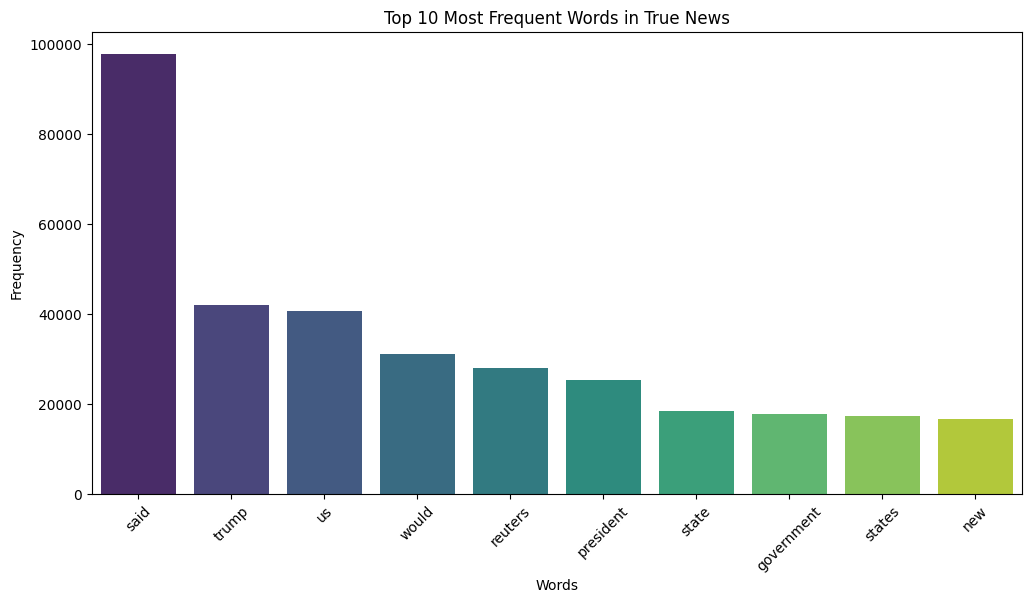

C:\Users\q1\AppData\Local\Temp\ipykernel_19688\928288881.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Word', y='Frequency', data=fake_plot_data, palette='viridis')


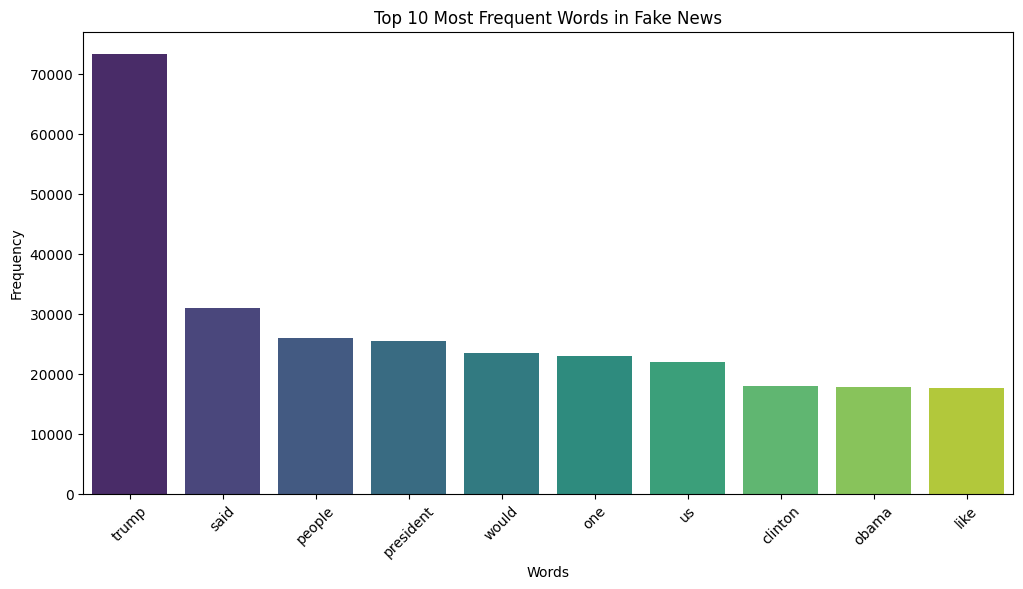

In [31]:
true_news = cleaned_data[cleaned_data['label'] == 1]
fake_news = cleaned_data[cleaned_data['label'] == 0]

all_true_words = []
true_news['text'].apply(lambda x: all_true_words.extend(word_tokenize(x)))

all_fake_words = []
fake_news['text'].apply(lambda x: all_fake_words.extend(word_tokenize(x)))

true_word_freq = Counter(all_true_words)
common_true_words = true_word_freq.most_common(10)  # Get the top 10 words

fake_word_freq = Counter(all_fake_words)
common_fake_words = fake_word_freq.most_common(10)  # Get the top 10 words

true_words, true_counts = zip(*common_true_words)
true_plot_data = pd.DataFrame({
    'Word': true_words,
    'Frequency': true_counts
})

fake_words, fake_counts = zip(*common_fake_words)
fake_plot_data = pd.DataFrame({
    'Word': fake_words,
    'Frequency': fake_counts
})

plt.figure(figsize=(12, 6))
sb.barplot(x='Word', y='Frequency', data=true_plot_data, palette='viridis')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in True News')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sb.barplot(x='Word', y='Frequency', data=fake_plot_data, palette='viridis')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Fake News')
plt.xticks(rotation=45)
plt.show()

### Text length distribution

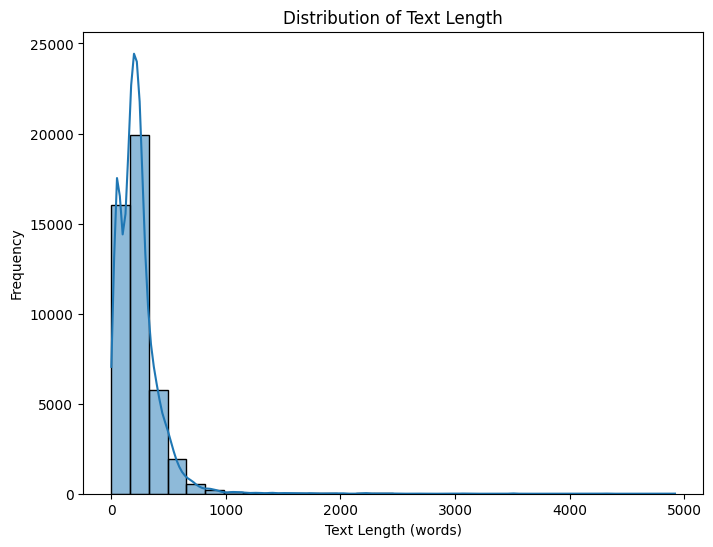

In [32]:
data['text_length'] =cleaned_data['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sb.histplot(data['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length (words)')
plt.ylabel('Frequency')
plt.show()


### Train Test Split

In [33]:
train_data, test_data = train_test_split(cleaned_data, test_size=0.2, random_state=42)


In [34]:
train_data.head()

,title,text,subject,date,label
7016,"Gorbachev, last Soviet leader, wants Trump-Put...",moscow reuters mikhail gorbachev last soviet l...,worldnews,"October 12, 2017",1
5230,U.S. senators urge NHTSA to accelerate Takata ...,detroitwashington reuters us senators edward m...,politicsNews,"February 24, 2016",1
40148,81-Year-Old Cuban Run Over By Racist A$$hole,florida continues lead nation head shaking ins...,News,"April 15, 2016",0
24349,YIKES! HILLARY GOES OFF THE RAILS…Pulls A Howa...,,politics,"Nov 7, 2016",0
42308,Even Trey Gowdy Thinks Trump’s Wiretap Conspi...,donald trump playing dangerous game falsely ac...,News,"March 6, 2017",0


### True and Fake news distribution in train data

Number of true news in training data: 16979
Number of fake news in training data: 18772


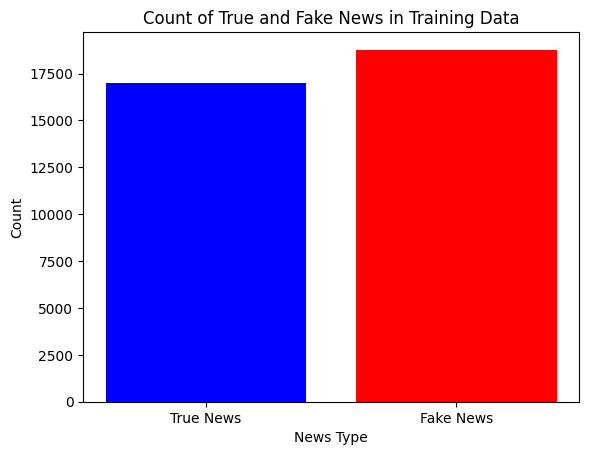

In [35]:
train_true_news = np.sum(train_data['label'] == 1)
train_fake_news = np.sum(train_data['label'] == 0)
print("Number of true news in training data:", train_true_news)
print("Number of fake news in training data:", train_fake_news)

# Create a bar chart
labels = ['True News', 'Fake News']
counts = [train_true_news, train_fake_news]

plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel('News Type')
plt.ylabel('Count')
plt.title('Count of True and Fake News in Training Data')
plt.show()

In [36]:
test_data.head()

,title,text,subject,date,label
17941,LOL! CNN Tells Viewers “IT’S ILLEGAL” To Read ...,wow cnn host chris cuomo tells viewers illegal...,left-news,"Oct 16, 2016",0
39658,Director Rob Reiner: ‘Moron’ Trump Is Last Ga...,racists confederate flag worshipers may celebr...,News,"November 15, 2016",0
36428,White House Staffer On Kushner FBI Investigat...,jared kushner one trump senior advisers soninl...,News,"May 26, 2017",0
21823,Serbia PM says must leave the past behind afte...,oslo reuters exbosnian serb general rakto mlad...,worldnews,"November 22, 2017",1
7572,Syrians vote in Kurdish-led regions of north,qamishli syria reuters syrians voted friday el...,worldnews,"September 22, 2017",1


### True and Fake news distribution in test data

Number of true news in test data: 4232
Number of fake news in test data: 4706


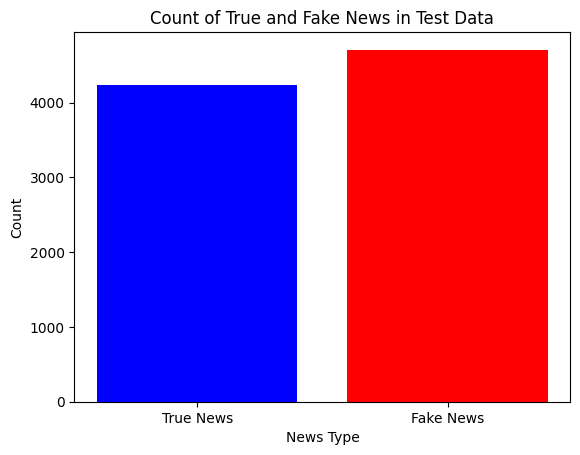

In [37]:
test_true_news = np.sum(test_data['label'] == 1)
test_fake_news = np.sum(test_data['label'] == 0)
print("Number of true news in test data:", test_true_news)
print("Number of fake news in test data:", test_fake_news)

# Create a bar chart
labels = ['True News', 'Fake News']
counts = [test_true_news, test_fake_news]

plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel('News Type')
plt.ylabel('Count')
plt.title('Count of True and Fake News in Test Data')
plt.show()